**Predict Delivery time using sort time**

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df_del = pd.read_csv('delivery_time.csv')
df_del.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


**Exploratory Data Analysis (EDA)**

In [3]:
df_del.shape

(21, 2)

In [4]:
# Check columns types. Since both are numeric, no type conversion required.
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


**Rename the columns**

In [5]:
df_del1 = df_del.rename({'Delivery Time': 'Delivery_Time', 'Sorting Time':'Sorting_Time'}, axis=1)
df_del1.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
## Mean, Median and Mode are 6.19, 6 and 7 respectively. Looks like normal distributed data.
print('Median of Sorting time column: ', df_del1['Sorting_Time'].median())
print('Mode of Sorting time column: ', df_del1['Sorting_Time'].mode())
print(df_del1.describe())


Median of Sorting time column:  6.0
Mode of Sorting time column:  0    7
dtype: int64
       Delivery_Time  Sorting_Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000


In [7]:
# Check for any duplicates. No duplicates exists.
df_del1[df_del1.duplicated()].shape

(0, 2)

In [8]:
# Check for null values
df_del1.isna().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

Conclusion: Both input columns (features ) and output variables are numeric. So, no type casting required. No null values exist. No duplicates exist.

**Outlier Detection**

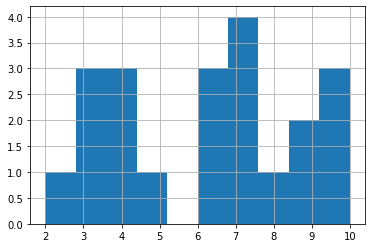

In [9]:
## Outlier Detection
df_del1['Sorting_Time'].hist()
## Distribution is not normal. Need to apply transformations and select best model among them.

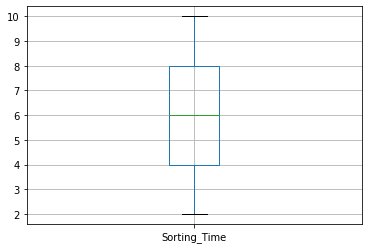

In [10]:
# Box plot indicates no outliers exists in feature column
df_del1.boxplot(column='Sorting_Time')

In [11]:
# Corelation between variables.
df_del1.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


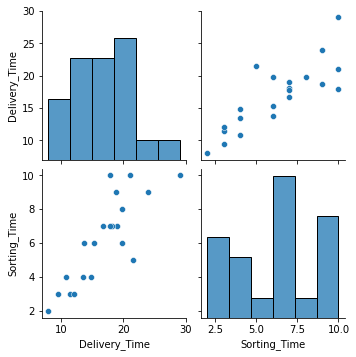

In [12]:
# Pair plot for visual reperesentation of correlation
sns.pairplot(df_del1)

Note: Observed good linear correlation between variables.

## SLR with actual data

In [13]:
import statsmodels.formula.api as smf
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
model_del1 = smf.ols('Delivery_Time ~ Sorting_Time', data = df_del1).fit()

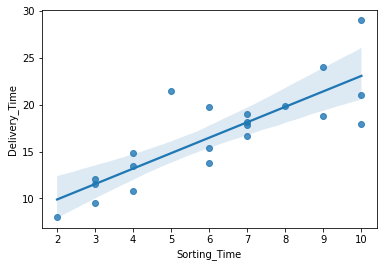

In [15]:
sns.regplot(x='Sorting_Time', y='Delivery_Time', data = df_del1)

In [16]:
# Delivery Time = 1.649020 * Sorting Time + 6.582734 
model_del1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [17]:
# P value of Sorting Time column is almost 0 which is less than 0.05 and R2 is greater than 0.5. Indicates good model.
model_del1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        17:37:59   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Prediction for new data**

In [18]:
# Predict for sorting time 11 and 12 values
newdata = pd.Series([11,12])

In [19]:
df_newdata = pd.DataFrame(data=newdata, columns=['Sorting_Time'])
df_newdata

,Sorting_Time
0,11
1,12


In [20]:
model_del1.predict(df_newdata)

0    24.721953
1    26.370973
dtype: float64

## SLR after applying log

**Creating new dataframe with log transformation and EDA** 

In [21]:
# Apply log on columns and create a new dataframe
df_del2 = pd.DataFrame()

In [22]:
df_del2['sorting_time_log'] = np.log10(df_del1['Sorting_Time'])
df_del2['delivery_time_log'] = np.log10(df_del1['Delivery_Time'])

In [23]:
df_del2.head()

,sorting_time_log,delivery_time_log
0,1.000000,1.322219
1,0.602060,1.130334
2,0.778151,1.295567
3,0.954243,1.380211
4,1.000000,1.462398


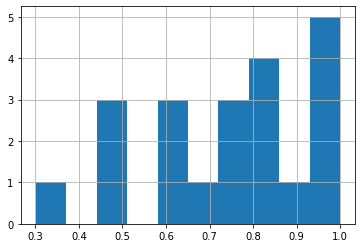

In [24]:
df_del2['sorting_time_log'].hist()  # Distribution looks good after applying log

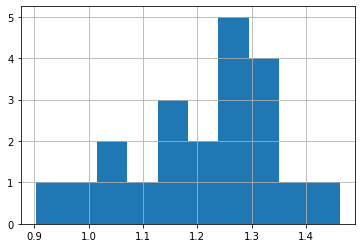

In [25]:
df_del2['delivery_time_log'].hist()

Note: Applying log transformation provided better results

In [26]:
# Check the corelation. Good positive relation exists between these two variables 
df_del2.corr()

,sorting_time_log,delivery_time_log
sorting_time_log,1.000000,0.878727
delivery_time_log,0.878727,1.000000


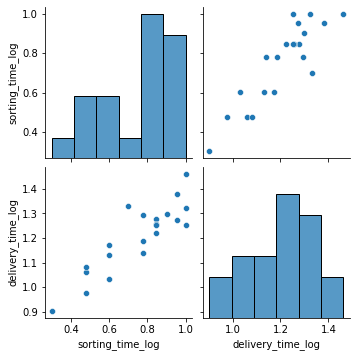

In [27]:
# Correlation plot between the two variables
import seaborn as sns
sns.pairplot(df_del2)

**SLR after applying log**

In [28]:
import statsmodels.formula.api as smf
import seaborn as sns

In [29]:
model_del2 = smf.ols('delivery_time_log ~ sorting_time_log', data = df_del2).fit()

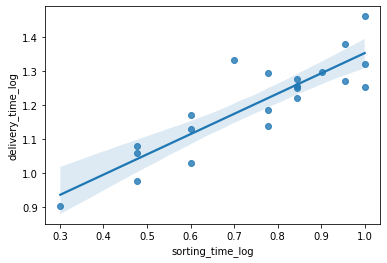

In [30]:
sns.regplot(x='sorting_time_log', y='delivery_time_log', data = df_del2)

In [31]:
model_del2.params

Intercept           0.756535
sorting_time_log    0.597522
dtype: float64

In [32]:
model_del2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      delivery_time_log   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           1.60e-07
Time:                        17:38:03   Log-Likelihood:                 27.805
No. Observations:                  21   AIC:                            -51.61
Df Residuals:                      19   BIC:                            -49.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7565      0.058     13.086      0.000       0.636       0.878
sorting_time_log     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         7.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Prediction for new data

In [33]:
newdata2 = pd.Series([1.0, 0.602060])

In [34]:
df_newdata2 = pd.DataFrame(data=newdata2, columns=['sorting_time_log'])
df_newdata2

,sorting_time_log
0,1.00000
1,0.60206


In [35]:
model_del2.predict(df_newdata2)

0    1.354058
1    1.116280
dtype: float64

## SLR after applying sqaure transformation

**Creating new dataframe with square transformation and EDA** 

In [36]:
df_del3 = pd.DataFrame()

In [37]:
df_del3['sorting_time_sq'] = np.square(df_del1['Sorting_Time'])
df_del3['delivery_time_sq'] = np.square(df_del1['Delivery_Time'])


In [38]:
df_del3.head()

,sorting_time_sq,delivery_time_sq
0,100,441.0000
1,16,182.2500
2,36,390.0625
3,81,576.0000
4,100,841.0000


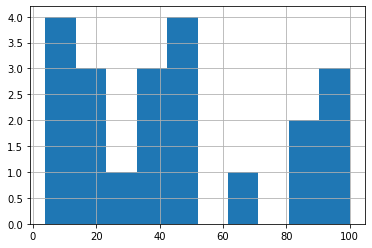

In [39]:
df_del3['sorting_time_sq'].hist()  

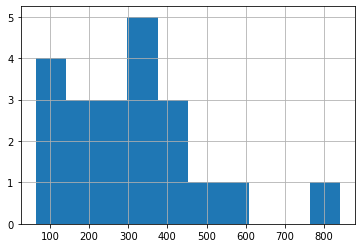

In [40]:
df_del3['delivery_time_sq'].hist()

In [41]:
df_del3.corr()

,sorting_time_sq,delivery_time_sq
sorting_time_sq,1.000000,0.766934
delivery_time_sq,0.766934,1.000000


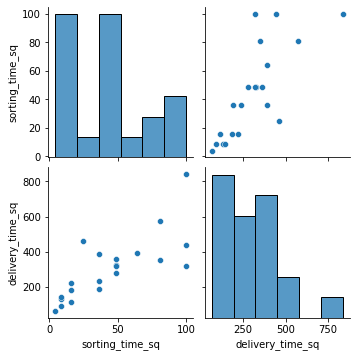

In [42]:
# Correlation plot between the two variables
import seaborn as sns
sns.pairplot(df_del3)

**SLR after applying square transformatiion**

In [43]:
import statsmodels.formula.api as smf
import seaborn as sns

In [44]:
model_del3 = smf.ols('delivery_time_sq ~ sorting_time_sq', data = df_del3).fit()

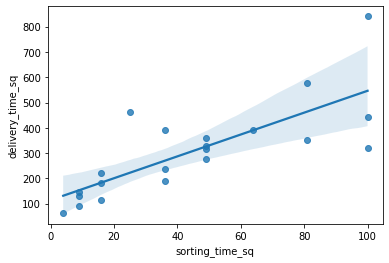

In [45]:
sns.regplot(x='sorting_time_sq', y='delivery_time_sq', data = df_del3)

In [46]:
model_del3.params

Intercept          114.154847
sorting_time_sq      4.323874
dtype: float64

In [47]:
model_del3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       delivery_time_sq   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     27.14
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           4.99e-05
Time:                        17:38:09   Log-Likelihood:                -129.24
No. Observations:                  21   AIC:                             262.5
Df Residuals:                      19   BIC:                             264.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         114.1548     45.231      2.524      0.021      19.485     208.825
sorting_time_sq     4.3239      0.830      5.209      0.000       2.587       6.061
==============================================================================
Omnibus:                        5.851   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                3.524
Skew:                           0.865   Prob(JB):                        0.172
Kurtosis:                       4.018   Cond. No.                         94.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Prediction for new data**

In [48]:
newdata3 = pd.Series([100, 16, 36])

In [49]:
df_newdata3 = pd.DataFrame(data=newdata3, columns=['sorting_time_sq'])
df_newdata3

,sorting_time_sq
0,100
1,16
2,36


In [50]:
model_del3.predict(df_newdata3)

0    546.542246
1    183.336831
2    269.814311
dtype: float64

## SLR after applying sqaure root transformation

**Creating new dataframe with square root transformation and EDA** 

In [51]:
df_del4 = pd.DataFrame()

In [52]:
df_del4['sorting_time_sqrt'] = np.sqrt(df_del1['Sorting_Time'])
df_del4['delivery_time_sqrt'] = np.sqrt(df_del1['Delivery_Time'])

In [53]:
df_del4.head()

,sorting_time_sqrt,delivery_time_sqrt
0,3.162278,4.582576
1,2.000000,3.674235
2,2.449490,4.444097
3,3.000000,4.898979
4,3.162278,5.385165


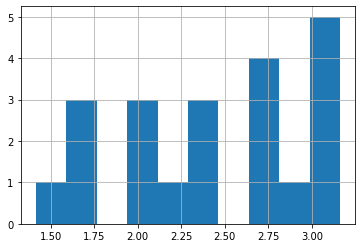

In [54]:
df_del4['sorting_time_sqrt'].hist()  

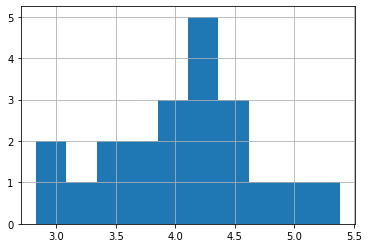

In [55]:
df_del4['delivery_time_sqrt'].hist()

In [56]:
# Check the corelation. 
df_del4.corr()

,sorting_time_sqrt,delivery_time_sqrt
sorting_time_sqrt,1.000000,0.853933
delivery_time_sqrt,0.853933,1.000000


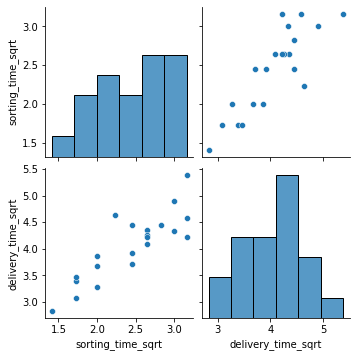

In [57]:
# Correlation plot between the two variables
import seaborn as sns
sns.pairplot(df_del4)

**SLR after applying square root transformatiion**

In [58]:
import statsmodels.formula.api as smf
import seaborn as sns

In [59]:
model_del4 = smf.ols('delivery_time_sqrt ~ sorting_time_sqrt', data = df_del4).fit()

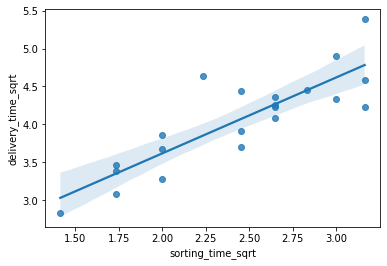

In [60]:
sns.regplot(x='sorting_time_sqrt', y='delivery_time_sqrt', data = df_del4)

In [61]:
model_del4.params

Intercept            1.613479
sorting_time_sqrt    1.002217
dtype: float64

In [62]:
model_del4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     delivery_time_sqrt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           8.48e-07
Time:                        17:38:15   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.6135      0.349      4.628      0.000       0.884       2.343
sorting_time_sqrt     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Prediction for new data**

In [63]:
newdata4 = pd.Series([3.162278, 2.0, 2.449490])

In [64]:
df_newdata4 = pd.DataFrame(data=newdata4, columns=['sorting_time_sqrt'])
df_newdata4

,sorting_time_sqrt
0,3.162278
1,2.000000
2,2.449490


In [65]:
model_del4.predict(df_newdata4)

0    4.782767
1    3.617912
2    4.068399
dtype: float64

Final Conclusion: 

All four models parameters are as follows.

With actual data: 
Correlation: 0.825997
R-Squared: 0.682
Adj. R-squared:	0.666

With log transformation: 
Correlation: 0.878727
R-squared:	0.772
Adj. R-squared:	0.760

With square transformation: 
Correlation: 0.766934
R-squared:	0.588
Adj. R-squared:	0.567

With Square root transformation:
Correlation: 0.853933
R-squared:	0.729
Adj. R-squared:	0.715

By comparing all above parameters, log transformation has best correlation, R-Squared and Adj. R-Squared values. So, log transformation SLR suits best for this delivery prediction. 

